In [25]:
import numpy as np
import pandas as pd
import string as st
import re
import nltk
from nltk import PorterStemmer,WordNetLemmatizer

In [5]:
data=pd.read_csv("C:\\Users\\lenovo\\OneDrive\\data science\\assignment\\NLP\\Elon_musk.csv",encoding="latin-1")
data=data.drop(columns=data.columns[0])
data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


# [Text cleaning and processing steps-]
## Remove punctuations
## Convert text to tokens
## Remove tokens of length less than or equal to 3
## Remove stopwords using NLTK corpus stopwords list to match
## Apply stemming
## Apply lemmatization
## Convert words to feature vectors

In [ ]:
# remove punctuations

In [7]:
#def remove_punt(text):
   # return ("".join([ch for ch in text if ch not in st.punctuation]))

In [317]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(st.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub(r"\S*https?:\S*", "", text)
    return text

In [318]:
data['removed_punc']=data['Text'].apply(lambda x:clean_text(x))
data.head()

,Text,removed_punc,tokens,larger_tokens,clean_tokens,stem_words,lem_words,clean_text
0,@kunalb11 Im an alien,im an alien,"[, im, an, alien]",[alien],[alien],[alien],[alien],alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing on cyberpunk with hdr ...,"[idaacarmack, ray, tracing, on, cyberpunk, wit...","[idaacarmack, tracing, cyberpunk, with, nextle...","[idaacarmack, tracing, cyberpunk, nextlevel, t...","[idaacarmack, trace, cyberpunk, nextlevel, tri]","[idaacarmack, trace, cyberpunk, nextlevel, tri]",idaacarmack trace cyberpunk nextlevel tri
2,@joerogan @Spotify Great interview!,joerogan spotify great interview,"[joerogan, spotify, great, interview]","[joerogan, spotify, great, interview]","[joerogan, spotify, great, interview]","[joerogan, spotifi, great, interview]","[joerogan, spotifi, great, interview]",joerogan spotifi great interview
3,@gtera27 Doge is underestimated,doge is underestimated,"[, doge, is, underestimated]","[doge, underestimated]","[doge, underestimated]","[doge, underestim]","[doge, underestim]",doge underestim
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazin...,"[teslacn, congratulations, tesla, china, for, ...","[teslacn, congratulations, tesla, china, amazi...","[teslacn, congratulations, tesla, china, amazi...","[teslacn, congratul, tesla, china, amaz, execu...","[teslacn, congratul, tesla, china, amaz, execu...",teslacn congratul tesla china amaz execut last...


In [319]:
# tokkenization

In [320]:
def tokenize(text):
    text=re.split('\s+',text)
    return [x.lower() for x in text]

In [321]:
data['tokens']=data['removed_punc'].apply(lambda x:tokenize(x))
data

,Text,removed_punc,tokens,larger_tokens,clean_tokens,stem_words,lem_words,clean_text
0,@kunalb11 Im an alien,im an alien,"[, im, an, alien]",[alien],[alien],[alien],[alien],alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing on cyberpunk with hdr ...,"[idaacarmack, ray, tracing, on, cyberpunk, wit...","[idaacarmack, tracing, cyberpunk, with, nextle...","[idaacarmack, tracing, cyberpunk, nextlevel, t...","[idaacarmack, trace, cyberpunk, nextlevel, tri]","[idaacarmack, trace, cyberpunk, nextlevel, tri]",idaacarmack trace cyberpunk nextlevel tri
2,@joerogan @Spotify Great interview!,joerogan spotify great interview,"[joerogan, spotify, great, interview]","[joerogan, spotify, great, interview]","[joerogan, spotify, great, interview]","[joerogan, spotifi, great, interview]","[joerogan, spotifi, great, interview]",joerogan spotifi great interview
3,@gtera27 Doge is underestimated,doge is underestimated,"[, doge, is, underestimated]","[doge, underestimated]","[doge, underestimated]","[doge, underestim]","[doge, underestim]",doge underestim
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazin...,"[teslacn, congratulations, tesla, china, for, ...","[teslacn, congratulations, tesla, china, amazi...","[teslacn, congratulations, tesla, china, amazi...","[teslacn, congratul, tesla, china, amaz, execu...","[teslacn, congratul, tesla, china, amaz, execu...",teslacn congratul tesla china amaz execut last...
...,...,...,...,...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy true it sounds so surreal but the nega...,"[flcnhvy, true, it, sounds, so, surreal, but, ...","[flcnhvy, true, sounds, surreal, negative, pro...","[flcnhvy, true, sounds, surreal, negative, pro...","[flcnhvi, true, sound, surreal, neg, propagand...","[flcnhvi, true, sound, surreal, neg, propagand...",flcnhvi true sound surreal neg propaganda stil...
1995,@PPathole Make sure to read ur terms &amp; con...,ppathole make sure to read ur terms amp condit...,"[ppathole, make, sure, to, read, ur, terms, am...","[ppathole, make, sure, read, terms, conditions...","[ppathole, make, sure, read, terms, conditions...","[ppathol, make, sure, read, term, condit, clic...","[ppathol, make, sure, read, term, condit, clic...",ppathol make sure read term condit click accept
1996,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee,"[teslagong, ppathole, samwise, gamgee]","[teslagong, ppathole, samwise, gamgee]","[teslagong, ppathole, samwise, gamgee]","[teslagong, ppathol, samwis, gamge]","[teslagong, ppathol, samwis, gamge]",teslagong ppathol samwis gamge
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathole altho dumb and dumber is,"[ppathole, altho, dumb, and, dumber, is, ]","[ppathole, altho, dumb, dumber]","[ppathole, altho, dumb, dumber]","[ppathol, altho, dumb, dumber]","[ppathol, altho, dumb, dumber]",ppathol altho dumb dumber


In [322]:
# removing the words whose length is less than 3

In [323]:

# Remove tokens of length less than 3
def remove_small_words(text):
    return [x for x in text if len(x) > 3 ]

In [324]:
data['larger_tokens'] = data['tokens'].apply(lambda x : remove_small_words(x))

In [325]:
data

,Text,removed_punc,tokens,larger_tokens,clean_tokens,stem_words,lem_words,clean_text
0,@kunalb11 Im an alien,im an alien,"[, im, an, alien]",[alien],[alien],[alien],[alien],alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing on cyberpunk with hdr ...,"[idaacarmack, ray, tracing, on, cyberpunk, wit...","[idaacarmack, tracing, cyberpunk, with, nextle...","[idaacarmack, tracing, cyberpunk, nextlevel, t...","[idaacarmack, trace, cyberpunk, nextlevel, tri]","[idaacarmack, trace, cyberpunk, nextlevel, tri]",idaacarmack trace cyberpunk nextlevel tri
2,@joerogan @Spotify Great interview!,joerogan spotify great interview,"[joerogan, spotify, great, interview]","[joerogan, spotify, great, interview]","[joerogan, spotify, great, interview]","[joerogan, spotifi, great, interview]","[joerogan, spotifi, great, interview]",joerogan spotifi great interview
3,@gtera27 Doge is underestimated,doge is underestimated,"[, doge, is, underestimated]","[doge, underestimated]","[doge, underestimated]","[doge, underestim]","[doge, underestim]",doge underestim
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazin...,"[teslacn, congratulations, tesla, china, for, ...","[teslacn, congratulations, tesla, china, amazi...","[teslacn, congratulations, tesla, china, amazi...","[teslacn, congratul, tesla, china, amaz, execu...","[teslacn, congratul, tesla, china, amaz, execu...",teslacn congratul tesla china amaz execut last...
...,...,...,...,...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy true it sounds so surreal but the nega...,"[flcnhvy, true, it, sounds, so, surreal, but, ...","[flcnhvy, true, sounds, surreal, negative, pro...","[flcnhvy, true, sounds, surreal, negative, pro...","[flcnhvi, true, sound, surreal, neg, propagand...","[flcnhvi, true, sound, surreal, neg, propagand...",flcnhvi true sound surreal neg propaganda stil...
1995,@PPathole Make sure to read ur terms &amp; con...,ppathole make sure to read ur terms amp condit...,"[ppathole, make, sure, to, read, ur, terms, am...","[ppathole, make, sure, read, terms, conditions...","[ppathole, make, sure, read, terms, conditions...","[ppathol, make, sure, read, term, condit, clic...","[ppathol, make, sure, read, term, condit, clic...",ppathol make sure read term condit click accept
1996,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee,"[teslagong, ppathole, samwise, gamgee]","[teslagong, ppathole, samwise, gamgee]","[teslagong, ppathole, samwise, gamgee]","[teslagong, ppathol, samwis, gamge]","[teslagong, ppathol, samwis, gamge]",teslagong ppathol samwis gamge
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathole altho dumb and dumber is,"[ppathole, altho, dumb, and, dumber, is, ]","[ppathole, altho, dumb, dumber]","[ppathole, altho, dumb, dumber]","[ppathol, altho, dumb, dumber]","[ppathol, altho, dumb, dumber]",ppathol altho dumb dumber


In [326]:
# remove stop words from the tokens

In [327]:
def remove_stopwords(text):
    return [word for word in text if word not in nltk.corpus.stopwords.words('english')]

In [328]:
data['clean_tokens']=data['larger_tokens'].apply(lambda x:remove_stopwords(x))

In [329]:
data

,Text,removed_punc,tokens,larger_tokens,clean_tokens,stem_words,lem_words,clean_text
0,@kunalb11 Im an alien,im an alien,"[, im, an, alien]",[alien],[alien],[alien],[alien],alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing on cyberpunk with hdr ...,"[idaacarmack, ray, tracing, on, cyberpunk, wit...","[idaacarmack, tracing, cyberpunk, with, nextle...","[idaacarmack, tracing, cyberpunk, nextlevel, t...","[idaacarmack, trace, cyberpunk, nextlevel, tri]","[idaacarmack, trace, cyberpunk, nextlevel, tri]",idaacarmack trace cyberpunk nextlevel tri
2,@joerogan @Spotify Great interview!,joerogan spotify great interview,"[joerogan, spotify, great, interview]","[joerogan, spotify, great, interview]","[joerogan, spotify, great, interview]","[joerogan, spotifi, great, interview]","[joerogan, spotifi, great, interview]",joerogan spotifi great interview
3,@gtera27 Doge is underestimated,doge is underestimated,"[, doge, is, underestimated]","[doge, underestimated]","[doge, underestimated]","[doge, underestim]","[doge, underestim]",doge underestim
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazin...,"[teslacn, congratulations, tesla, china, for, ...","[teslacn, congratulations, tesla, china, amazi...","[teslacn, congratulations, tesla, china, amazi...","[teslacn, congratul, tesla, china, amaz, execu...","[teslacn, congratul, tesla, china, amaz, execu...",teslacn congratul tesla china amaz execut last...
...,...,...,...,...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy true it sounds so surreal but the nega...,"[flcnhvy, true, it, sounds, so, surreal, but, ...","[flcnhvy, true, sounds, surreal, negative, pro...","[flcnhvy, true, sounds, surreal, negative, pro...","[flcnhvi, true, sound, surreal, neg, propagand...","[flcnhvi, true, sound, surreal, neg, propagand...",flcnhvi true sound surreal neg propaganda stil...
1995,@PPathole Make sure to read ur terms &amp; con...,ppathole make sure to read ur terms amp condit...,"[ppathole, make, sure, to, read, ur, terms, am...","[ppathole, make, sure, read, terms, conditions...","[ppathole, make, sure, read, terms, conditions...","[ppathol, make, sure, read, term, condit, clic...","[ppathol, make, sure, read, term, condit, clic...",ppathol make sure read term condit click accept
1996,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee,"[teslagong, ppathole, samwise, gamgee]","[teslagong, ppathole, samwise, gamgee]","[teslagong, ppathole, samwise, gamgee]","[teslagong, ppathol, samwis, gamge]","[teslagong, ppathol, samwis, gamge]",teslagong ppathol samwis gamge
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathole altho dumb and dumber is,"[ppathole, altho, dumb, and, dumber, is, ]","[ppathole, altho, dumb, dumber]","[ppathole, altho, dumb, dumber]","[ppathol, altho, dumb, dumber]","[ppathol, altho, dumb, dumber]",ppathol altho dumb dumber


In [330]:
# stemming-to get root words
def stemming(text):
    ps=PorterStemmer()
    return [ps.stem(word) for word in text]

In [331]:
data['stem_words']=data['clean_tokens'].apply(lambda x:stemming(x))

In [332]:
data

,Text,removed_punc,tokens,larger_tokens,clean_tokens,stem_words,lem_words,clean_text
0,@kunalb11 Im an alien,im an alien,"[, im, an, alien]",[alien],[alien],[alien],[alien],alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing on cyberpunk with hdr ...,"[idaacarmack, ray, tracing, on, cyberpunk, wit...","[idaacarmack, tracing, cyberpunk, with, nextle...","[idaacarmack, tracing, cyberpunk, nextlevel, t...","[idaacarmack, trace, cyberpunk, nextlevel, tri]","[idaacarmack, trace, cyberpunk, nextlevel, tri]",idaacarmack trace cyberpunk nextlevel tri
2,@joerogan @Spotify Great interview!,joerogan spotify great interview,"[joerogan, spotify, great, interview]","[joerogan, spotify, great, interview]","[joerogan, spotify, great, interview]","[joerogan, spotifi, great, interview]","[joerogan, spotifi, great, interview]",joerogan spotifi great interview
3,@gtera27 Doge is underestimated,doge is underestimated,"[, doge, is, underestimated]","[doge, underestimated]","[doge, underestimated]","[doge, underestim]","[doge, underestim]",doge underestim
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazin...,"[teslacn, congratulations, tesla, china, for, ...","[teslacn, congratulations, tesla, china, amazi...","[teslacn, congratulations, tesla, china, amazi...","[teslacn, congratul, tesla, china, amaz, execu...","[teslacn, congratul, tesla, china, amaz, execu...",teslacn congratul tesla china amaz execut last...
...,...,...,...,...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy true it sounds so surreal but the nega...,"[flcnhvy, true, it, sounds, so, surreal, but, ...","[flcnhvy, true, sounds, surreal, negative, pro...","[flcnhvy, true, sounds, surreal, negative, pro...","[flcnhvi, true, sound, surreal, neg, propagand...","[flcnhvi, true, sound, surreal, neg, propagand...",flcnhvi true sound surreal neg propaganda stil...
1995,@PPathole Make sure to read ur terms &amp; con...,ppathole make sure to read ur terms amp condit...,"[ppathole, make, sure, to, read, ur, terms, am...","[ppathole, make, sure, read, terms, conditions...","[ppathole, make, sure, read, terms, conditions...","[ppathol, make, sure, read, term, condit, clic...","[ppathol, make, sure, read, term, condit, clic...",ppathol make sure read term condit click accept
1996,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee,"[teslagong, ppathole, samwise, gamgee]","[teslagong, ppathole, samwise, gamgee]","[teslagong, ppathole, samwise, gamgee]","[teslagong, ppathol, samwis, gamge]","[teslagong, ppathol, samwis, gamge]",teslagong ppathol samwis gamge
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathole altho dumb and dumber is,"[ppathole, altho, dumb, and, dumber, is, ]","[ppathole, altho, dumb, dumber]","[ppathole, altho, dumb, dumber]","[ppathol, altho, dumb, dumber]","[ppathol, altho, dumb, dumber]",ppathol altho dumb dumber


In [333]:
def lemmatize(text):
    ls=WordNetLemmatizer()
    return [ls.lemmatize(word) for word in text]

In [334]:
data['lem_words']=data['stem_words'].apply(lambda x:lemmatize(x))
data

,Text,removed_punc,tokens,larger_tokens,clean_tokens,stem_words,lem_words,clean_text
0,@kunalb11 Im an alien,im an alien,"[, im, an, alien]",[alien],[alien],[alien],[alien],alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing on cyberpunk with hdr ...,"[idaacarmack, ray, tracing, on, cyberpunk, wit...","[idaacarmack, tracing, cyberpunk, with, nextle...","[idaacarmack, tracing, cyberpunk, nextlevel, t...","[idaacarmack, trace, cyberpunk, nextlevel, tri]","[idaacarmack, trace, cyberpunk, nextlevel, tri]",idaacarmack trace cyberpunk nextlevel tri
2,@joerogan @Spotify Great interview!,joerogan spotify great interview,"[joerogan, spotify, great, interview]","[joerogan, spotify, great, interview]","[joerogan, spotify, great, interview]","[joerogan, spotifi, great, interview]","[joerogan, spotifi, great, interview]",joerogan spotifi great interview
3,@gtera27 Doge is underestimated,doge is underestimated,"[, doge, is, underestimated]","[doge, underestimated]","[doge, underestimated]","[doge, underestim]","[doge, underestim]",doge underestim
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazin...,"[teslacn, congratulations, tesla, china, for, ...","[teslacn, congratulations, tesla, china, amazi...","[teslacn, congratulations, tesla, china, amazi...","[teslacn, congratul, tesla, china, amaz, execu...","[teslacn, congratul, tesla, china, amaz, execu...",teslacn congratul tesla china amaz execut last...
...,...,...,...,...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy true it sounds so surreal but the nega...,"[flcnhvy, true, it, sounds, so, surreal, but, ...","[flcnhvy, true, sounds, surreal, negative, pro...","[flcnhvy, true, sounds, surreal, negative, pro...","[flcnhvi, true, sound, surreal, neg, propagand...","[flcnhvi, true, sound, surreal, neg, propagand...",flcnhvi true sound surreal neg propaganda stil...
1995,@PPathole Make sure to read ur terms &amp; con...,ppathole make sure to read ur terms amp condit...,"[ppathole, make, sure, to, read, ur, terms, am...","[ppathole, make, sure, read, terms, conditions...","[ppathole, make, sure, read, terms, conditions...","[ppathol, make, sure, read, term, condit, clic...","[ppathol, make, sure, read, term, condit, clic...",ppathol make sure read term condit click accept
1996,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee,"[teslagong, ppathole, samwise, gamgee]","[teslagong, ppathole, samwise, gamgee]","[teslagong, ppathole, samwise, gamgee]","[teslagong, ppathol, samwis, gamge]","[teslagong, ppathol, samwis, gamge]",teslagong ppathol samwis gamge
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathole altho dumb and dumber is,"[ppathole, altho, dumb, and, dumber, is, ]","[ppathole, altho, dumb, dumber]","[ppathole, altho, dumb, dumber]","[ppathol, altho, dumb, dumber]","[ppathol, altho, dumb, dumber]",ppathol altho dumb dumber


In [335]:
# Create sentences to get clean text as input for vectors
def return_sentences(tokens):
    return " ".join([word for word in tokens])

In [336]:
data['clean_text'] = data['lem_words'].apply(lambda x : return_sentences(x))
data.head()

,Text,removed_punc,tokens,larger_tokens,clean_tokens,stem_words,lem_words,clean_text
0,@kunalb11 Im an alien,im an alien,"[, im, an, alien]",[alien],[alien],[alien],[alien],alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing on cyberpunk with hdr ...,"[idaacarmack, ray, tracing, on, cyberpunk, wit...","[idaacarmack, tracing, cyberpunk, with, nextle...","[idaacarmack, tracing, cyberpunk, nextlevel, t...","[idaacarmack, trace, cyberpunk, nextlevel, tri]","[idaacarmack, trace, cyberpunk, nextlevel, tri]",idaacarmack trace cyberpunk nextlevel tri
2,@joerogan @Spotify Great interview!,joerogan spotify great interview,"[joerogan, spotify, great, interview]","[joerogan, spotify, great, interview]","[joerogan, spotify, great, interview]","[joerogan, spotifi, great, interview]","[joerogan, spotifi, great, interview]",joerogan spotifi great interview
3,@gtera27 Doge is underestimated,doge is underestimated,"[, doge, is, underestimated]","[doge, underestimated]","[doge, underestimated]","[doge, underestim]","[doge, underestim]",doge underestim
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazin...,"[teslacn, congratulations, tesla, china, for, ...","[teslacn, congratulations, tesla, china, amazi...","[teslacn, congratulations, tesla, china, amazi...","[teslacn, congratul, tesla, china, amaz, execu...","[teslacn, congratul, tesla, china, amaz, execu...",teslacn congratul tesla china amaz execut last...


In [337]:
# count vectorizer

In [338]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [339]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['clean_text'])
X.shape

(1999, 3488)

In [300]:
vectorizer.vocabulary_

{'alien': 79,
 'idaacarmack': 1496,
 'trace': 3181,
 'cyberpunk': 700,
 'nextlevel': 2061,
 'tri': 3199,
 'joerogan': 1630,
 'spotifi': 2856,
 'great': 1241,
 'interview': 1574,
 'doge': 825,
 'underestim': 3252,
 'teslacn': 3049,
 'congratul': 608,
 'tesla': 3043,
 'china': 501,
 'amaz': 102,
 'execut': 995,
 'last': 1710,
 'year': 3465,
 'next': 2060,
 'even': 973,
 'happi': 1280,
 'frodo': 1143,
 'underdog': 3251,
 'thought': 3114,
 'would': 3449,
 'fail': 1026,
 'httpstcozgxjfdzzrm': 1470,
 'owenspark': 2176,
 'flcnhvi': 1089,
 'haha': 1266,
 'thank': 3080,
 'inde': 1533,
 'tweet': 3231,
 'definit': 745,
 'repres': 2503,
 'realworld': 2455,
 'time': 3128,
 'alloc': 82,
 'entertain': 943,
 'outcom': 2157,
 'like': 1757,
 'givedirectli': 1213,
 'sent': 2670,
 'agre': 58,
 'clubhous': 542,
 'kanyewest': 1657,
 'geoffkeighley': 1193,
 'unrealengin': 3278,
 'it': 1590,
 'get': 1198,
 'real': 2444,
 'bought': 368,
 'dogecoin': 827,
 'toddler': 3148,
 'hodler': 1341,
 'joshmanmod': 1639,


In [340]:
print(vectorizer.get_feature_names()[1:20])
print(X.toarray()[0:50])

['abl', 'aboard', 'abort', 'absenc', 'absolut', 'absorb', 'absorpt', 'absurd', 'absurdli', 'academia', 'accel', 'acceler', 'accelera', 'accept', 'access', 'accid', 'accident', 'accommod', 'account']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [341]:
print(X.toarray().shape)

(1999, 3488)


In [342]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [343]:
# Convert lemmatized words to Tf-Idf feature vectors
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_vect = tfidf.fit_transform(data['clean_text'])
tfidf_vect.shape

(1999, 3488)

In [344]:
print(vectorizer.get_feature_names()[1:20])
print(X.toarray()[0:50])

['abl', 'aboard', 'abort', 'absenc', 'absolut', 'absorb', 'absorpt', 'absurd', 'absurdli', 'academia', 'accel', 'acceler', 'accelera', 'accept', 'access', 'accid', 'accident', 'accommod', 'account']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [345]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [202]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [203]:
# workcloud

In [346]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [347]:
def plot_cloud(workcloud):
    plt.figure(figsize=(30,40))
    plt.imshow(workcloud)
    plt.axis('off')
    

In [348]:
clean_tweets=' '.join(data.clean_text)
clean_tweets

'alien idaacarmack trace cyberpunk nextlevel tri joerogan spotifi great interview doge underestim teslacn congratul tesla china amaz execut last year next even happi year frodo underdog thought would fail httpstcozgxjfdzzrm owenspark flcnhvi haha thank flcnhvi inde tweet definit repres realworld time alloc entertain outcom like givedirectli sent agre clubhous kanyewest  geoffkeighley unrealengin it\x92 get real bought dogecoin toddler hodler joshmanmod definit issu sentenc seem high freewalletorg thank fix freewalletorg plea unlock account astrojordi true power haha freewalletorg crypto wallet won\x92t give privat key avoid cost freewalletorg suck spacex nasa select falcon heavi launch first element lunar gateway togeth mission ajtourvil rationaletienn adamklotz predict cash flow reason well starlink rationaletienn adamklotz starlink staggeringli difficult technic econom endeavor howev rationaletienn adamklotz spacex need pas deep chasm neg cash flow next year idaacarmack lowest cost c

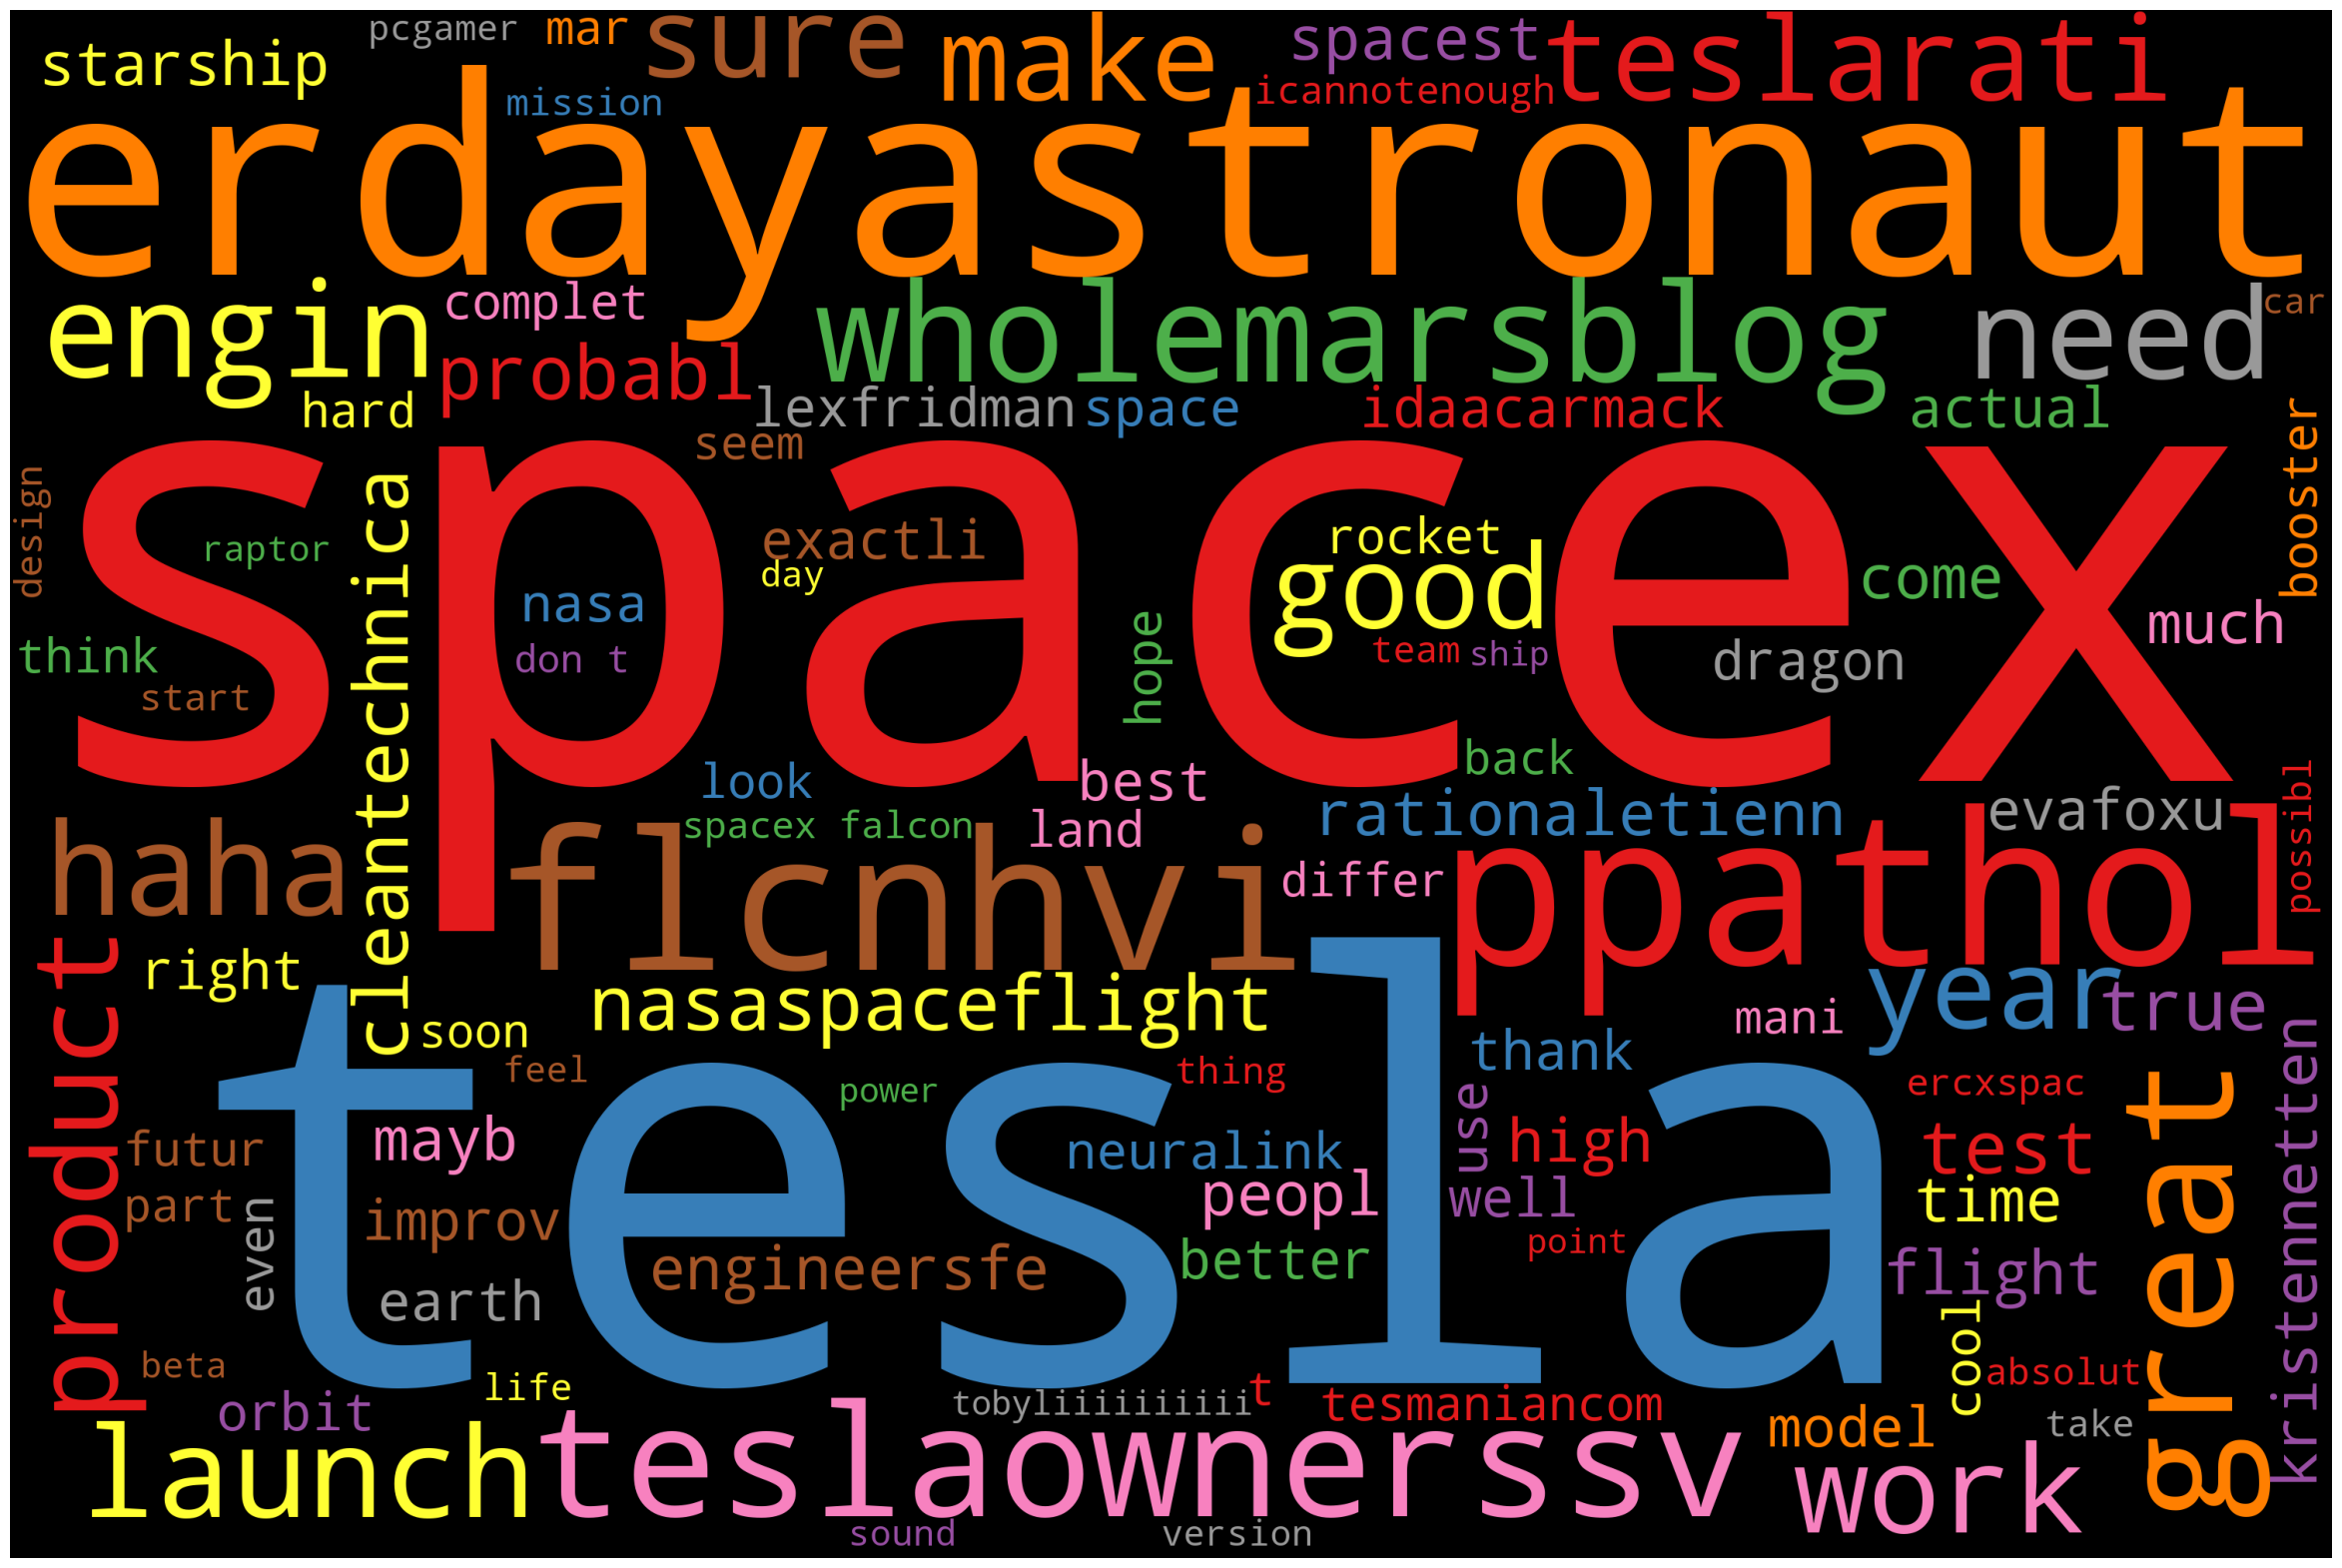

In [349]:
STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=100,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

In [ ]:
# Name entity recognition

In [312]:
pip install -U spacy

Note: you may need to restart the kernel to use updated packages.


In [313]:
!python -m spacy download en_core_web_md

     ---------------------------------------- 42.8/42.8 MB 5.9 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [350]:
##Part Of Speech Tagging
nlp = spacy.load("en_core_web_md")

one_block = clean_tweets
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [ ]:
# Sentiment analysis

In [351]:
for token in doc_block:
    print(token, token.pos_)

alien PROPN
idaacarmack PROPN
trace PROPN
cyberpunk PROPN
nextlevel PROPN
tri PROPN
joerogan PROPN
spotifi PROPN
great ADJ
interview NOUN
doge PROPN
underestim ADJ
teslacn PROPN
congratul PROPN
tesla PROPN
china PROPN
amaz PROPN
execut NOUN
last ADJ
year NOUN
next ADV
even ADV
happi PROPN
year PROPN
frodo PROPN
underdog NOUN
thought NOUN
would AUX
fail VERB
httpstcozgxjfdzzrm PROPN
owenspark PROPN
flcnhvi PROPN
haha PROPN
thank PROPN
flcnhvi PROPN
inde PROPN
tweet PROPN
definit PROPN
repres VERB
realworld PROPN
time PROPN
alloc PROPN
entertain PROPN
outcom PROPN
like SCONJ
givedirectli PROPN
sent VERB
agre PROPN
clubhous ADJ
kanyewest PROPN
  SPACE
geoffkeighley PROPN
unrealengin PROPN
it PROPN
get VERB
real ADV
bought VERB
dogecoin NOUN
toddler PROPN
hodler PROPN
joshmanmod PROPN
definit PROPN
issu PROPN
sentenc PROPN
seem VERB
high ADJ
freewalletorg PROPN
thank PROPN
fix VERB
freewalletorg PROPN
plea PROPN
unlock PROPN
account PROPN
astrojordi PROPN
true ADJ
power NOUN
haha PROPN
fr

In [353]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(token,nouns_verbs)

august ['interview', 'execut', 'year', 'underdog', 'thought', 'fail', 'repres', 'sent', 'get', 'bought', 'dogecoin', 'seem', 'fix', 'power', 'wallet', 'give', 'privat', 'key', 'cost', 'suck', 'launch', 'element', 'gateway', 'mission', 'predict', 'cash', 'flow', 'reason', 'starlink', 'staggeringli', 'need', 'pas', 'chasm', 'neg', 'cash', 'flow', 'year', 'idaacarmack', 'carbon', 'valu', 'product', 'made', 'scalabl', 'adamklotz', 'meant', 'price', 'countri', 'differ', 'tax', 'ship', 'tobyliiiiiiiiii', 'intend', 'earth', 'idea', 'appli', 'team', 'manag', 'carbon', 'captur', 'prize', 'comp', 'stockopt', 'take', 'tabl', 'that\x92', 'miss', 'work', 'seem', 'appear', 'meaning', 'fix', 'coin', 'unit', 'launch', 'tower', 'stack', 'raptor', 'orbit', 'booster', 'improv', 'ship', 'booster', 'mass', 'michaelhodapp', 'work', 'tonight', 'instruct', 'video', 'spoken', 'reflect', 'time', 'cost', 'peopl', 'rain', 'pain', 'rainforest', 'come', 'wapodavenport', 'intens', 'work', 'look', 'note', 'email', 't

In [ ]:
# sentiment analysis

In [354]:
data=pd.read_csv("C:\\Users\\lenovo\\OneDrive\\data science\\assignment\\NLP\\Elon_musk.csv",encoding="latin-1")
data=data.drop(columns=data.columns[0])
data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [360]:
tweet=' '.join(data.Text)
tweet

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [355]:
def clean_text(text):
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    return text

In [362]:
Text=clean_text(tweet)
Text

'kunalb11 Im an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox  Frodo was the underdogeAll thought he would failHimself most of all  OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest  geoffkeighley UnrealEngine Its getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha  freewalletorg Any crypto wallet that wont give you your private keys should be avoided at a

In [365]:
lower_text=Text.lower()
#lower_text

In [366]:
# remove stop words

In [375]:
text = " ".join([word for word in lower_text.split() if word not in nltk.corpus.stopwords.words('english')])
text

'kunalb11 im alien idaacarmack ray tracing cyberpunk hdr nextlevel tried joerogan spotify great interview gtera27 doge underestimated teslacn congratulations tesla china amazing execution last year next even happy new year ox frodo underdogeall thought would failhimself owensparks flcnhvy anonyx10 haha thanks flcnhvy anonyx10 indeed tweets definitely represent realworld time allocation entertaining outcome likely givedirectly sent agree clubhouse kanyewest geoffkeighley unrealengine getting real bought dogecoin lil x toddler hodler joshmanmode definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy u0001f923u0001f923 true power haha freewalletorg crypto wallet wont give private keys avoided costs freewalletorg app sucks rt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission ajtourville yes blkmdl3 rationaletienne adamklotz predict cash flow reasonably well starlink ipo rationaletie

In [ ]:
# removing numbers

In [376]:
text = ''.join([i for i in text if not i.isdigit()])
text

'kunalb im alien idaacarmack ray tracing cyberpunk hdr nextlevel tried joerogan spotify great interview gtera doge underestimated teslacn congratulations tesla china amazing execution last year next even happy new year ox frodo underdogeall thought would failhimself owensparks flcnhvy anonyx haha thanks flcnhvy anonyx indeed tweets definitely represent realworld time allocation entertaining outcome likely givedirectly sent agree clubhouse kanyewest geoffkeighley unrealengine getting real bought dogecoin lil x toddler hodler joshmanmode definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy ufuf true power haha freewalletorg crypto wallet wont give private keys avoided costs freewalletorg app sucks rt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission ajtourville yes blkmdl rationaletienne adamklotz predict cash flow reasonably well starlink ipo rationaletienne adamklotz starlink 

In [377]:
!pip install autocorrect

     -------------------------------------- 622.8/622.8 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=65cac9b9e0a5a1dfa66df1da032f2cdbcb8ef5ad2b23b4f6cf03053beca40df0
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\ab\0f\23\3c010c3fd877b962146e7765f9e9b08026cac8b035094c5750
Successfully built autocorrect


In [ ]:
import itertools
from autocorrect import Speller
text_correction = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))
spell = Speller(lang='en')
ans = spell(text_correction)
print("After correcting text:n{}".format(ans))